<a href="https://colab.research.google.com/github/codeofelango/ML_Customer_personality_analysis/blob/main/Customer_personality_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

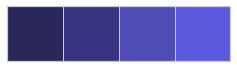

In [3]:
import pandas as pd # Python library for data analysis and data frame
import numpy as np # Numerical Python library for linear algebra and computations
pd.set_option('display.max_columns', None) # code to display all columns

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import date, datetime # for manupulating time and date columns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler # For handling categorical column and scaling numeric columns

# Libraries for clustering and evaluation
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore") # To prevent kernel from showing any warning

# set the color palette
palette = sns.color_palette(["#292859",'#373482','#504DB6','#5B59DD'])
sns.palplot(palette) # print color palette

In [6]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [7]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [8]:
df.shape

(2240, 29)

In [9]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1616,5423,1983,Graduation,Together,28359.0,1,0,27-10-2013,35,6,0,5,2,1,2,1,1,0,2,7,0,0,0,0,0,0,3,11,0
2013,1951,1981,Basic,Married,34445.0,0,0,27-01-2013,92,228,122,122,208,129,30,6,11,2,8,9,0,0,0,0,0,0,3,11,0
55,6260,1955,Master,Together,82384.0,0,0,19-11-2012,55,984,51,432,180,120,190,1,3,10,13,1,0,0,1,0,0,0,3,11,1
981,3955,1965,Graduation,Divorced,4861.0,0,0,22-06-2014,20,2,1,1,1,0,1,0,0,0,0,14,0,0,0,0,0,0,3,11,0
1698,10356,1957,PhD,Divorced,41437.0,1,1,22-09-2012,5,29,0,2,0,0,1,1,1,0,3,7,0,0,0,0,0,0,3,11,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [11]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [12]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [13]:
df.duplicated().sum()

0

Going to clean the data  

Observations 
1. Data contains 2240 rows and 29 columns
2. It has 1 float, 3 object and 25 int columns
3. Datetime columns have int datatype, need to fix that
4. Many categorical columns are alredy in int format, like AcceptedCmp1, Response
5. There are 24 missing values in Income column
6. There are no duplicate values within data



Steps To Follow to clean the data:

First of all I am going to fix the column names

I will convert the datetime column into correct format

Then I'll take care of the missing values

Examin the unique values within categorical columns

Check the timeline of the data since we have datetime columns given

In [14]:
df.rename(columns = {'MntGoldProds':'MntGoldProducts'}, inplace = True)

In [15]:
# converting columns to DateTime format
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format ='%Y')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [16]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954-01-01,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965-01-01,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984-01-01,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967-01-01,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946-01-01,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981-01-01,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956-01-01,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [17]:
df.describe()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   datetime64[ns]
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [19]:
df['Income'].skew()

6.763487372811116

📌   If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.

In [20]:
# Replacing null values with median cause the data is skewed which means there are outliers in the data
df['Income'].fillna(df['Income'].median(), inplace = True)

In [21]:
# check the unique values
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [22]:
# check the unique values
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [23]:
# findout the first and last date in dataset
df["Dt_Customer"].dt.year.min() , df["Dt_Customer"].dt.year.max()

(2012, 2014)

Steps To Follow:

Create Age,Years_Customer and Days_Customer columns by substracting last date of Dt_Customer from Year_Birth and Dt_Customer

Create TotalMntSpent,TotalNumPurchases and TotalAccCmp by adding the relative columns

Create Year_Joined,Month_Joined and Day_Joined columns through dt_Customer

Create Age_Group column by dividing Age column into different groups

Create Children column by adding Kidhome and Teenhome columns

Create Partner and Education_Level for simplifying 
Marital_Status and Education columns

Drop the redundant columns

In [24]:
# Creating Age and Years_Customer ( Amount of years a personn has been customer) columns.
df['Age'] = (df["Dt_Customer"].dt.year.max()) - (df['Year_Birth'].dt.year)

In [25]:
df["Dt_Customer"].dt.year.max()

2014

In [26]:
df['Year_Birth'].dt.year

0       1957
1       1954
2       1965
3       1984
4       1981
        ... 
2235    1967
2236    1946
2237    1981
2238    1956
2239    1954
Name: Year_Birth, Length: 2240, dtype: int64

In [27]:
df['Age']

0       57
1       60
2       49
3       30
4       33
        ..
2235    47
2236    68
2237    33
2238    58
2239    60
Name: Age, Length: 2240, dtype: int64

In [28]:
df['Years_Customer'] = (df["Dt_Customer"].dt.year.max()) - (df['Dt_Customer'].dt.year)


In [29]:
df['Years_Customer']

0       2
1       0
2       1
3       0
4       0
       ..
2235    1
2236    0
2237    0
2238    0
2239    2
Name: Years_Customer, Length: 2240, dtype: int64

In [30]:
df["Dt_Customer"].max()

Timestamp('2014-12-06 00:00:00')

In [31]:
df['Days_Customer'] = (df["Dt_Customer"].max()) - (df['Dt_Customer'])

In [32]:
# Total amount spent on products
df['TotalMntSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProducts']


In [33]:
# Total number of purchases made
df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']


In [34]:
# Total number of accepted campaigns
df['Total_Acc_Cmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

In [35]:
df['Day_Joined'] = df['Dt_Customer'].dt.day_name()

In [36]:
df['Day_Joined']

0          Monday
1          Sunday
2       Wednesday
3        Thursday
4          Sunday
          ...    
2235     Thursday
2236       Monday
2237     Saturday
2238       Friday
2239       Monday
Name: Day_Joined, Length: 2240, dtype: object

In [37]:
# dividing age into groups
df['Age_Group'] = pd.cut(x = df['Age'], bins = [17, 24, 44, 64, 150],
                         labels = ['Young adult','Adult','Middel Aged','Senior Citizen'])

In [38]:
df['Age_Group']

0          Middel Aged
1          Middel Aged
2          Middel Aged
3                Adult
4                Adult
             ...      
2235       Middel Aged
2236    Senior Citizen
2237             Adult
2238       Middel Aged
2239       Middel Aged
Name: Age_Group, Length: 2240, dtype: category
Categories (4, object): ['Young adult' < 'Adult' < 'Middel Aged' < 'Senior Citizen']

In [39]:
# Total children living in the household
df["Children"] = df["Kidhome"] +  df["Teenhome"]

In [40]:
#Deriving living situation by marital status
df["Partner"]=df["Marital_Status"].replace({"Married":"Yes", "Together":"Yes", "Absurd":"No", "Widow":"No", "YOLO":"No", "Divorced":"No", "Single":"No","Alone":"No"})

In [41]:
#Segmenting education levels in three groups
df["Education_Level"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [42]:
df["Education_Level"] 

0           Graduate
1           Graduate
2           Graduate
3           Graduate
4       Postgraduate
            ...     
2235        Graduate
2236    Postgraduate
2237        Graduate
2238    Postgraduate
2239    Postgraduate
Name: Education_Level, Length: 2240, dtype: object

In [43]:
# Dropping useless columns
df.drop(['ID','Z_CostContact','Z_Revenue','Year_Birth','Dt_Customer'], axis=1, inplace=True)

In [44]:
# Converting Days_Joined to int format
df['Days_Customer'] = df['Days_Customer'].dt.days.astype('int16')

In [45]:
print(df.shape)
df.sample(5)

(2240, 35)


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Years_Customer,Days_Customer,TotalMntSpent,TotalNumPurchases,Total_Acc_Cmp,Day_Joined,Age_Group,Children,Partner,Education_Level
960,Graduation,Divorced,70647.0,0,1,65,561,85,171,25,123,114,2,4,7,13,2,0,0,0,0,0,0,0,47,2,806,1079,26,0,Friday,Middel Aged,1,No,Graduate
1647,Graduation,Single,58684.0,0,0,71,479,35,179,28,7,85,1,5,3,12,2,0,1,0,0,0,0,0,33,0,173,813,21,1,Monday,Adult,0,No,Graduate
1569,PhD,Married,75283.0,1,2,26,733,9,180,12,19,66,11,6,3,5,4,0,0,0,0,0,0,0,57,1,619,1019,25,0,Wednesday,Middel Aged,3,Yes,Postgraduate
1886,PhD,Married,44155.0,1,1,24,22,1,9,0,0,14,1,1,1,2,4,0,0,0,0,0,0,0,57,0,321,46,5,0,Sunday,Middel Aged,2,Yes,Postgraduate
1972,Graduation,Together,34600.0,1,1,8,199,33,60,8,3,15,5,5,2,5,8,0,0,0,0,0,0,1,43,1,704,318,17,1,Tuesday,Adult,2,Yes,Graduate


📌   The above dataset is really good to perform EDA. I can extract really good insights from all these columns. However i won't be using all these columns to form clusters. Lots of the data we have like Amount spents on different products, number of purchases etc. This data won't be available for new customers. So i will be training model using those columns only wich will be available for new customers so the model can predict the cluster. I hope you Understood it.


In [46]:
df1 = df.copy() # make a copy
df1.drop(['Education','Marital_Status','Years_Customer','Day_Joined'], axis=1, inplace=True)

Let's use capping technique to treat outliers
Capping: Instead of trimming or removing the values from the dataset, we convert the outliers and bring them in the limit or range of our data. Here we will convert all the outliers values to value of upper whisker and lower whisker.



In [47]:
num_col = df1.select_dtypes(include = np.number).columns


In [48]:
for col in num_col:
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3-q1
    ll = q1-(1.5*iqr)
    ul = q3+(1.5*iqr)
    for ind in df1[col].index:
        if df1.loc[ind,col]>ul:
            df1.loc[ind,col]=ul
        elif df1.loc[ind,col]<ll:
            df1.loc[ind,col]=ll
        else:
            pass
print("Outliers have been taken care of")

Outliers have been taken care of


In [49]:
#As I already explained above, I will use subset of data to form clusters

# selecting the cols to use
subset = df1[['Income','Kidhome','Teenhome','Age','Partner','Education_Level']]
print('This is the data we will use for clustering:')
subset.head()



This is the data we will use for clustering:


,Income,Kidhome,Teenhome,Age,Partner,Education_Level
0,58138.0,0,0,57,No,Graduate
1,46344.0,1,1,60,No,Graduate
2,71613.0,0,0,49,Yes,Graduate
3,26646.0,1,0,30,Yes,Graduate
4,58293.0,1,0,33,Yes,Postgraduate


In [50]:
# examin the min, max and mean of your columns
subset.describe()


,Income,Kidhome,Teenhome,Age
count,2240.000000,2240.000000,2240.000000,2240.000000
mean,51865.874554,0.444196,0.506250,45.147768
std,20936.104821,0.538398,0.544538,11.771725
min,1730.000000,0.000000,0.000000,18.000000
25%,35538.750000,0.000000,0.000000,37.000000
50%,51381.500000,0.000000,0.000000,44.000000
75%,68289.750000,1.000000,1.000000,55.000000
max,117416.250000,2.000000,2.000000,82.000000


Pipeline:

A machine learning pipeline is a way to codify and automate the workflow it takes to produce a machine learning model. Machine learning pipelines consist of multiple sequential steps that do everything from data extraction and preprocessing to model training and deployment.

Always try to build pipelines whenever you are going to deploy the model

In [51]:
df1['Partner']

0        No
1        No
2       Yes
3       Yes
4       Yes
       ... 
2235    Yes
2236    Yes
2237     No
2238    Yes
2239    Yes
Name: Partner, Length: 2240, dtype: object

In [52]:
df1['Education_Level']

0           Graduate
1           Graduate
2           Graduate
3           Graduate
4       Postgraduate
            ...     
2235        Graduate
2236    Postgraduate
2237        Graduate
2238    Postgraduate
2239    Postgraduate
Name: Education_Level, Length: 2240, dtype: object

In [53]:
# Importing essential libraries for bulding pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer


In [54]:
# I am not scaling the kidhome, teenhome cols, cause thire min, max lies between 0 & 2
num_cols = ['Income','Age']
numeric_pipeline = make_pipeline(StandardScaler())


In [58]:
ord_cols = ['Education_Level']
ordinal_pipeline = make_pipeline(OrdinalEncoder(categories=[['Undergraduate','Graduate','Postgraduate']]))


In [55]:
nom_cols = ['Partner']
nominal_pipeline = make_pipeline(OneHotEncoder())


In [59]:
# stack your pipelines in column transformer
transformer = ColumnTransformer(transformers=[('num',numeric_pipeline,num_cols),
                                           ('ordinal', ordinal_pipeline,ord_cols),
                                              ('nominal' ,nominal_pipeline,nom_cols)
                                             ])


In [60]:
df1

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Days_Customer,TotalMntSpent,TotalNumPurchases,Total_Acc_Cmp,Age_Group,Children,Partner,Education_Level
0,58138.0,0,0,58,635,81,546,120.5,81,88.0,3,8,10,4,7,0,0,0,0,0,0,0,57,971,1617.0,25.0,1.0,Middel Aged,0.0,No,Graduate
1,46344.0,1,1,38,11,1,6,2.0,1,6.0,2,1,1,2,5,0,0,0,0,0,0,0,60,125,27.0,6.0,0.0,Middel Aged,2.0,No,Graduate
2,71613.0,0,0,26,426,49,127,111.0,21,42.0,1,8,2,10,4,0,0,0,0,0,0,0,49,472,776.0,21.0,0.0,Middel Aged,0.0,Yes,Graduate
3,26646.0,1,0,26,11,4,20,10.0,3,5.0,2,2,0,4,6,0,0,0,0,0,0,0,30,65,53.0,8.0,0.0,Adult,1.0,Yes,Graduate
4,58293.0,1,0,94,173,43,118,46.0,27,15.0,5,5,3,6,5,0,0,0,0,0,0,0,33,321,422.0,19.0,0.0,Adult,1.0,Yes,Postgraduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42.0,81,126.5,2,9,3,4,5,0,0,0,0,0,0,0,47,541,1341.0,18.0,0.0,Middel Aged,1.0,Yes,Graduate
2236,64014.0,2,1,56,406,0,30,0.0,0,8.0,6,8,2,5,7,0,0,0,0,0,0,0,68,61,444.0,22.0,1.0,Senior Citizen,2.5,Yes,Postgraduate
2237,56981.0,0,0,91,908,48,217,32.0,12,24.0,1,2,3,13,6,0,0,0,0,0,0,0,33,315,1241.0,19.0,1.0,Adult,0.0,No,Graduate
2238,69245.0,0,1,8,428,30,214,80.0,30,61.0,2,6,5,10,3,0,0,0,0,0,0,0,58,316,843.0,23.0,0.0,Middel Aged,1.0,Yes,Postgraduate


In [61]:
# Now lets fit and transform the data
transformed = transformer.fit_transform(subset)
print('Data has been Transformed')


Data has been Transformed


In [62]:
transformed

array([[ 0.29965106,  1.00706384,  1.        ,  1.        ,  0.        ],
       [-0.26380779,  1.2619687 ,  1.        ,  1.        ,  0.        ],
       [ 0.94341975,  0.32731756,  1.        ,  0.        ,  1.        ],
       ...,
       [ 0.24437533, -1.032175  ,  1.        ,  1.        ,  0.        ],
       [ 0.83028845,  1.09203213,  2.        ,  0.        ,  1.        ],
       [ 0.04792436,  1.2619687 ,  2.        ,  0.        ,  1.        ]])

In [63]:
df1.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Days_Customer,TotalMntSpent,TotalNumPurchases,Total_Acc_Cmp,Age_Group,Children,Partner,Education_Level
0,58138.0,0,0,58,635,81,546,120.5,81,88.0,3,8,10,4,7,0,0,0,0,0,0,0,57,971,1617.0,25.0,1.0,Middel Aged,0.0,No,Graduate
1,46344.0,1,1,38,11,1,6,2.0,1,6.0,2,1,1,2,5,0,0,0,0,0,0,0,60,125,27.0,6.0,0.0,Middel Aged,2.0,No,Graduate
2,71613.0,0,0,26,426,49,127,111.0,21,42.0,1,8,2,10,4,0,0,0,0,0,0,0,49,472,776.0,21.0,0.0,Middel Aged,0.0,Yes,Graduate
3,26646.0,1,0,26,11,4,20,10.0,3,5.0,2,2,0,4,6,0,0,0,0,0,0,0,30,65,53.0,8.0,0.0,Adult,1.0,Yes,Graduate
4,58293.0,1,0,94,173,43,118,46.0,27,15.0,5,5,3,6,5,0,0,0,0,0,0,0,33,321,422.0,19.0,0.0,Adult,1.0,Yes,Postgraduate


In [64]:
subset

,Income,Kidhome,Teenhome,Age,Partner,Education_Level
0,58138.0,0,0,57,No,Graduate
1,46344.0,1,1,60,No,Graduate
2,71613.0,0,0,49,Yes,Graduate
3,26646.0,1,0,30,Yes,Graduate
4,58293.0,1,0,33,Yes,Postgraduate
...,...,...,...,...,...,...
2235,61223.0,0,1,47,Yes,Graduate
2236,64014.0,2,1,68,Yes,Postgraduate
2237,56981.0,0,0,33,No,Graduate
2238,69245.0,0,1,58,Yes,Postgraduate


In [65]:
#***************************K-MEANS CLUSTERING & CLUSTER's ANALYSIS


📌   The KElbowVisualizer implements the “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for K.


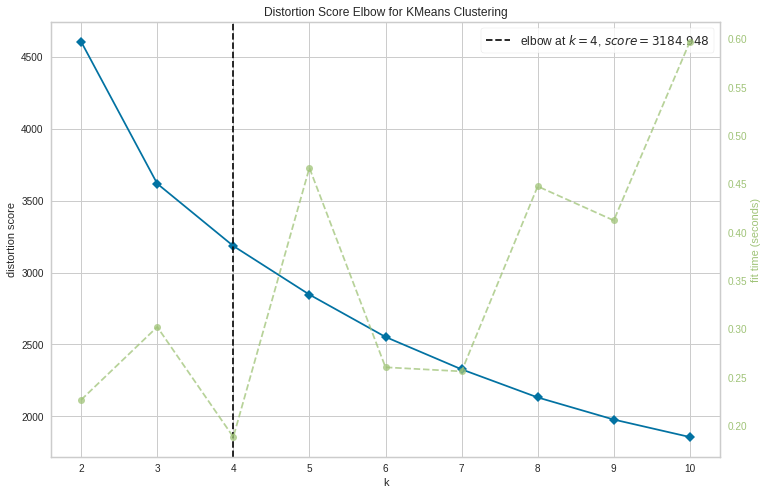

In [66]:
plt.figure(figsize=(12, 8))
elbow_graph = KElbowVisualizer(KMeans(random_state=43), k=10)
elbow_graph.fit(transformed)
elbow_graph.show()


In [67]:
#From above it is clear that k=4
# using k-means to form clusters
kmeans = KMeans(n_clusters=4, random_state=42)
subset['Clusters'] = kmeans.fit_predict(transformed) #fit the data and adding back clusters to the data in clusters column



In [68]:
subset.head()


,Income,Kidhome,Teenhome,Age,Partner,Education_Level,Clusters
0,58138.0,0,0,57,No,Graduate,2
1,46344.0,1,1,60,No,Graduate,2
2,71613.0,0,0,49,Yes,Graduate,1
3,26646.0,1,0,30,Yes,Graduate,0
4,58293.0,1,0,33,Yes,Postgraduate,1


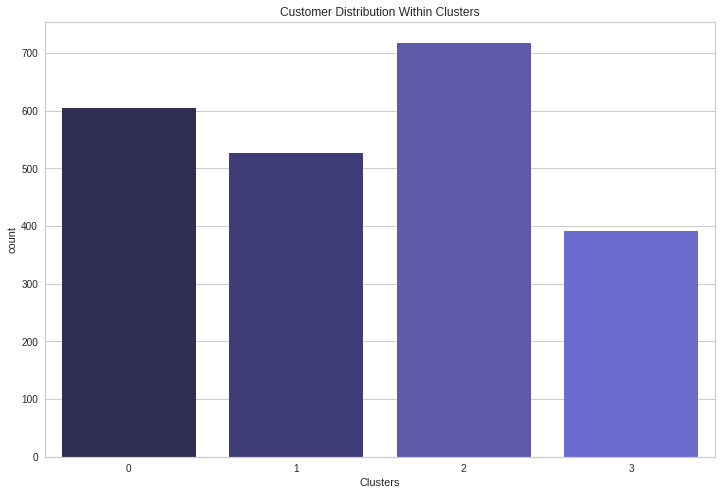

In [69]:
# count plot to see number of customers in each cluster
plt.figure(figsize=(12, 8))
sns.countplot(x='Clusters', data=subset, palette=palette)
plt.title('Customer Distribution Within Clusters')
plt.show()


Observations 👀
1. Cluster 2 has highest number of customers
2. Cluster 3 has least number of customers


In [ ]:
#Lets find out what number of customers in each cluster have how many Kids or Teens in household, how many of them have partner and their education level


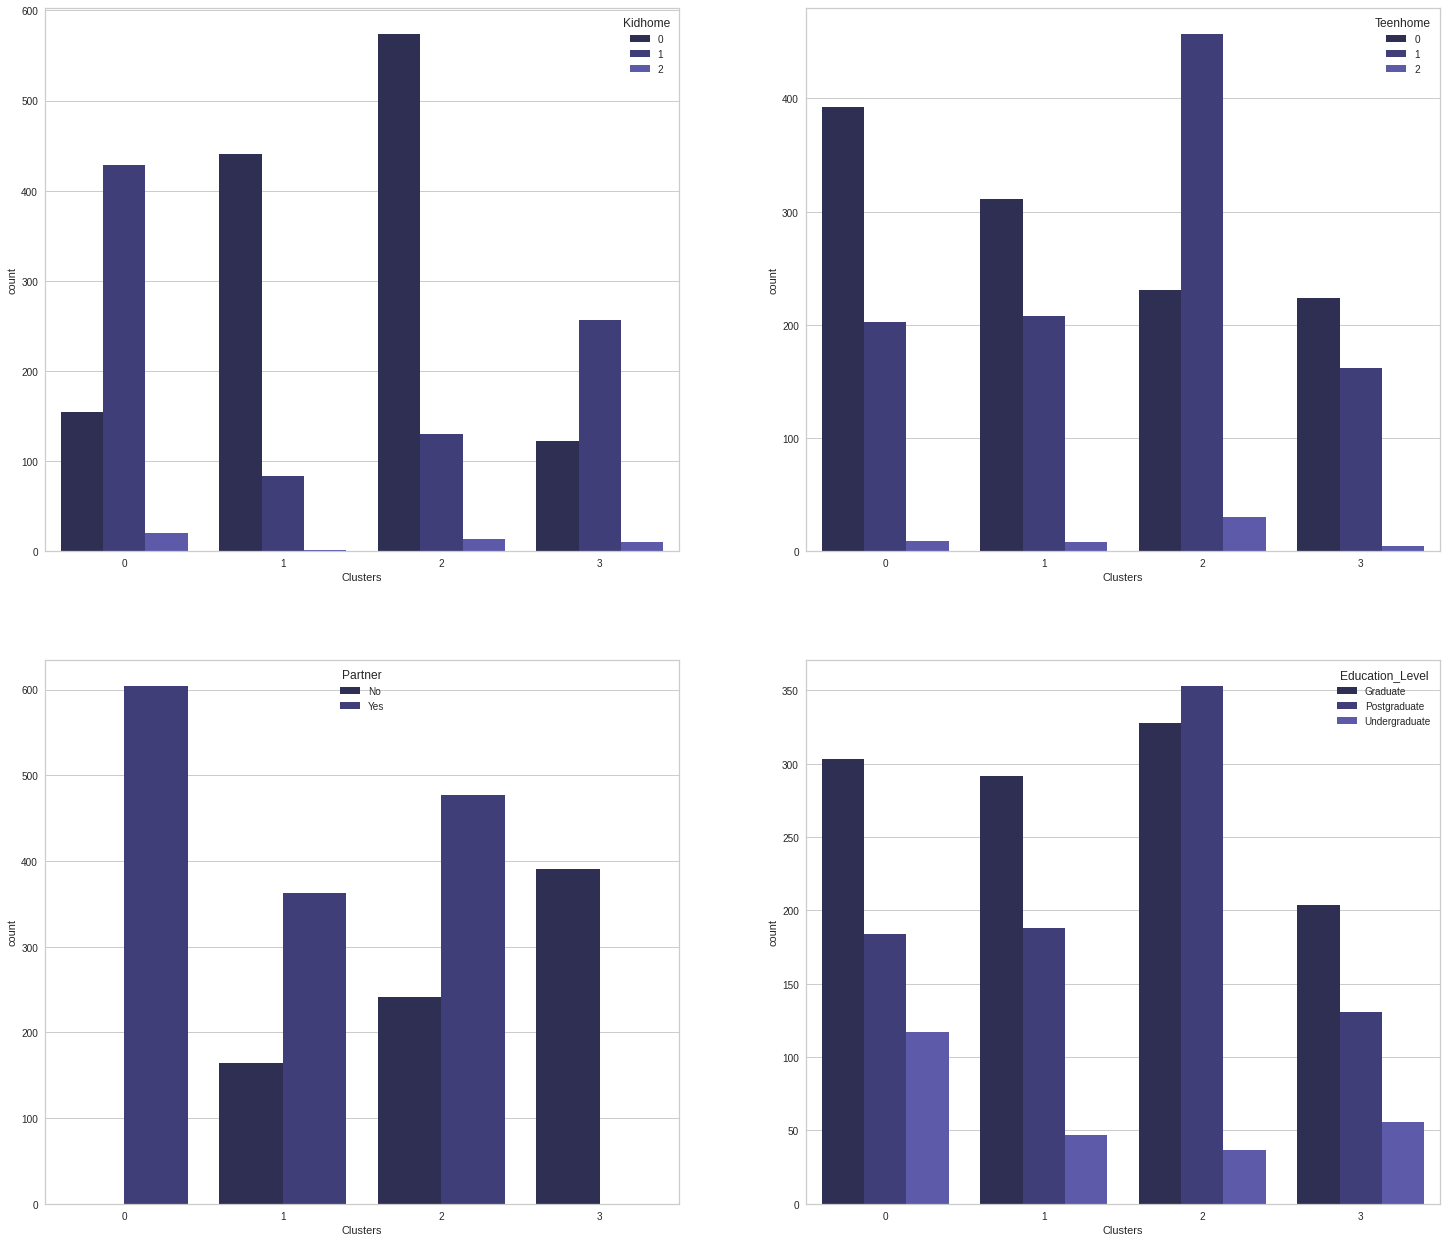

In [70]:
# create list of categories
count_cols= ['Kidhome','Teenhome','Partner','Education_Level']

_, ax1 = plt.subplots(2,2, figsize=(25,22))

for i, col in enumerate(count_cols):
    sns.countplot(x='Clusters', data=subset, ax=ax1[i//2, i%2],hue=col,palette=palette)
    
plt.show()

Observations 👀
**Kidhome:** * Cluster 0 mostly has customers with 1 kid in household * Cluster 1 has customers with no kids in household * Cluster 2 also has large number of customers with no kids in household * Cluster 3 has customers with 0 and 1 kids in household **Teenhome:** * Cluster 0 consist of customers with no teen in household & few of them have 1 Teen in household * Same goes for the cluster 1 & 3 * Cluster 2 has customers with 1 Teen in household **Partner:** * All the customers in cluster 0 have partner * All The customers in cluster 3 have no partner * Cluster 1 & 2 has customers with and without partner, but most of them have partner **Education_Level:** * All clusters have customers with graduate, postgraduate and undergraduate background * All clusters have less number of customers with undergraduate background * Cluter 2 has highest number of postgraduates and graduates


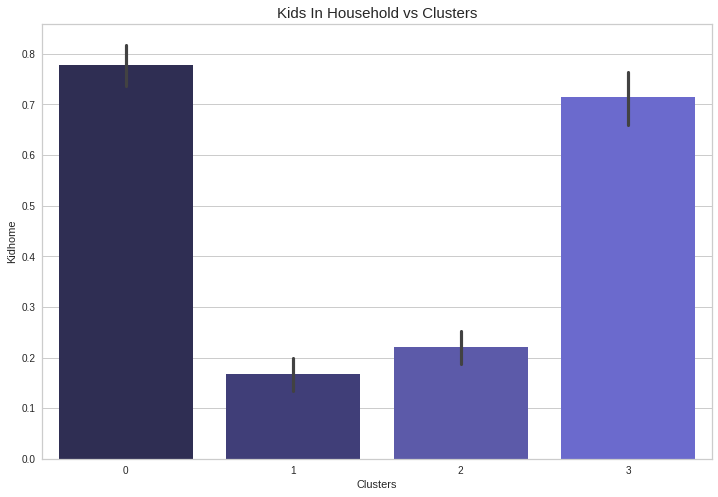

In [71]:
# Find out the customers which have kids in different clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=subset["Clusters"], y=subset["Kidhome"],palette=palette)
plt.title("Kids In Household vs Clusters", size=15)
plt.show()


Observation:

Cluster 0 and 3 has the maximum number of customers with kids in household


Cluster 1 and 2 has the least number of customers with kids in household

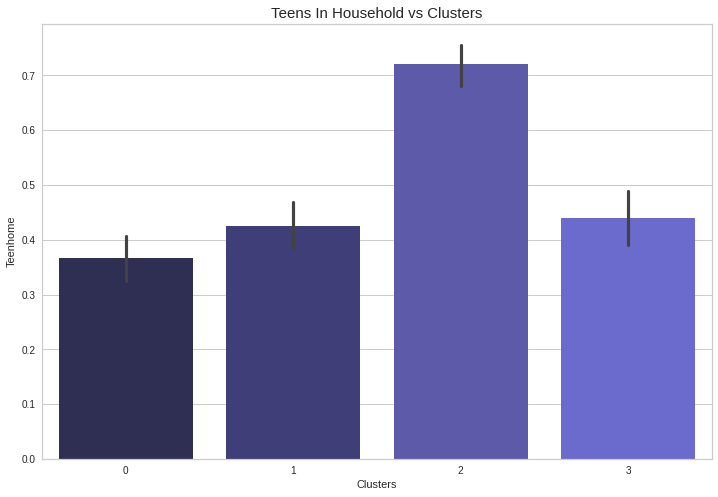

In [72]:
# Find out the customers which have kids in different clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=subset["Clusters"], y=subset["Teenhome"],palette=palette)
plt.title("Teens In Household vs Clusters", size=15)
plt.show()


Observations 👀
1. Cluster 2 has maximum number of customers having Teens in household

2. Remaining Clusters also have customers with Teens in household but they are less as compared to cluster 2


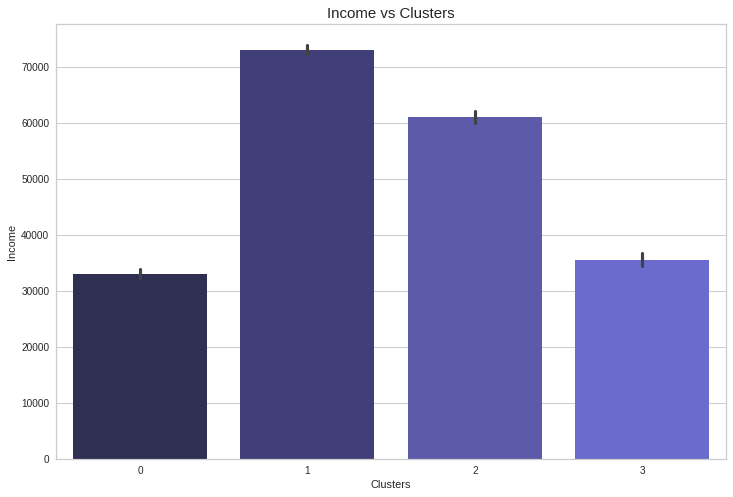

In [73]:
# Lets findout income of customers with in clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=subset["Clusters"], y=subset["Income"],palette=palette)
plt.title("Income vs Clusters", size=15)
plt.show()


Observations 👀
1. Cluster 1 has high Income followed by cluster 2. Which is little strange cause cluster 2 has highest number of customers and most number of post graduates & graduates as compared to cluster 1
2. Cluster 0 and 3 has least income


Following graphs shows what are the contributing factors in income


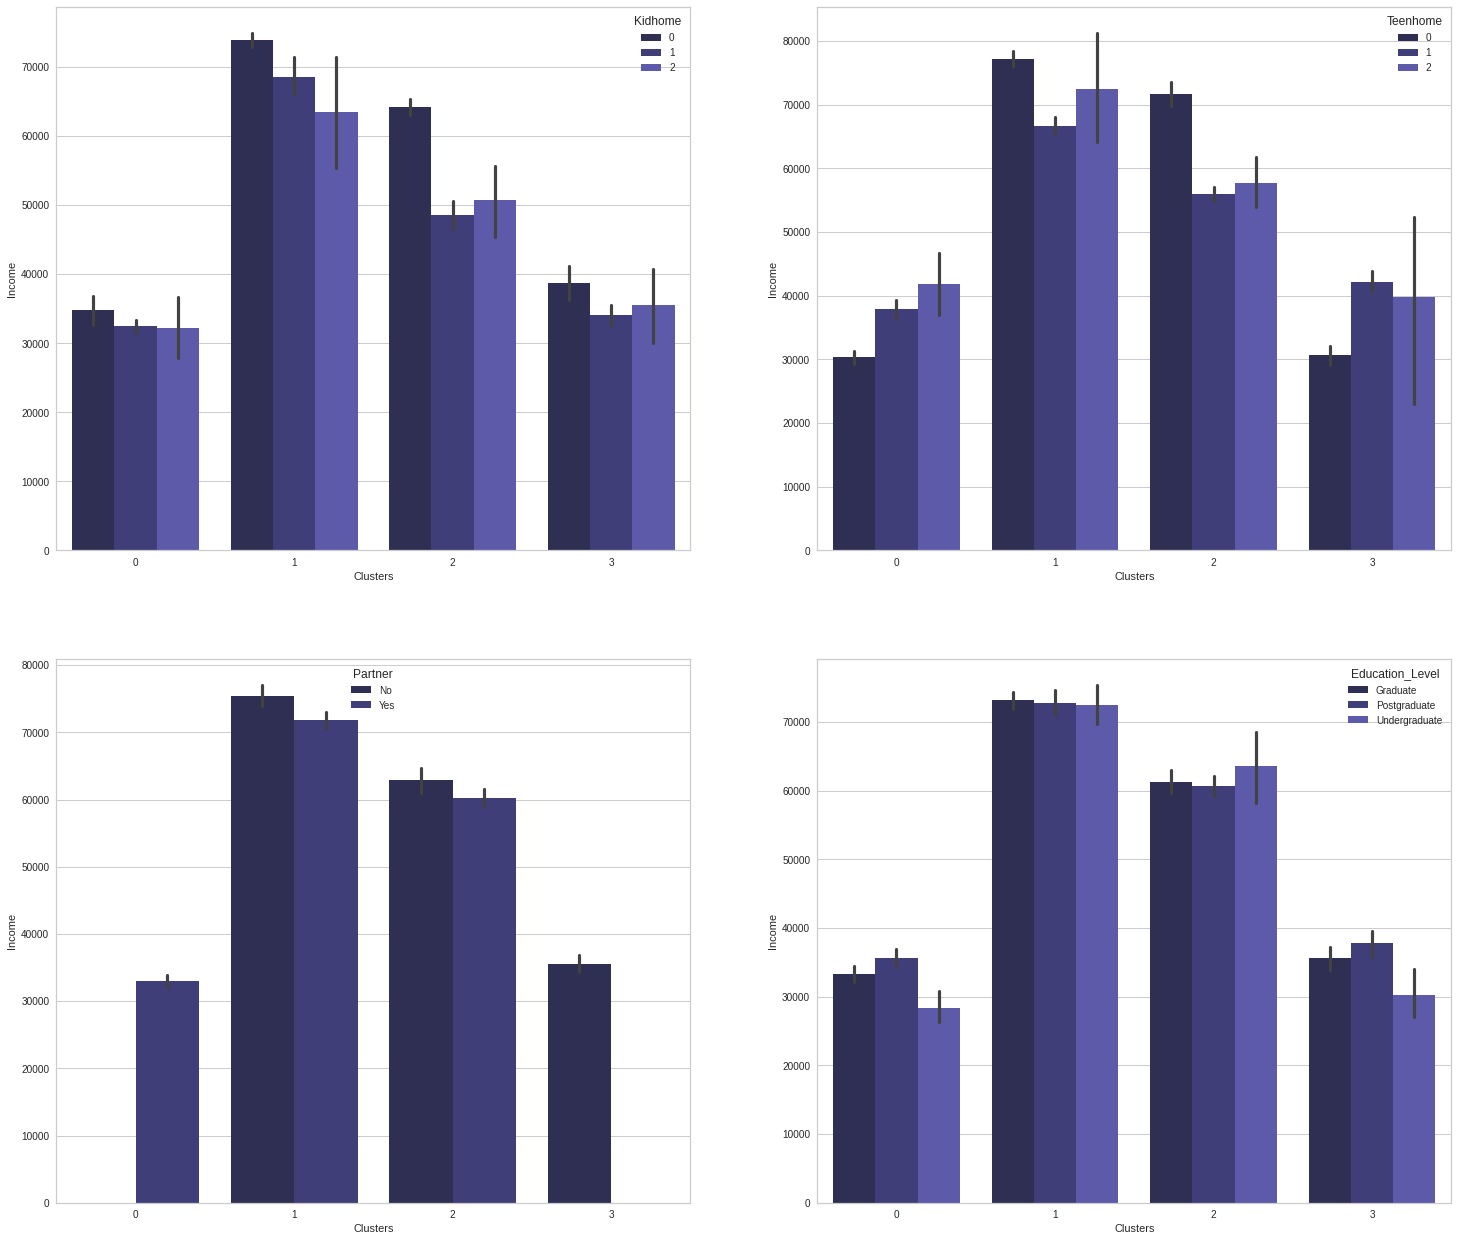

In [74]:
catcols= ['Kidhome','Teenhome','Partner','Education_Level']

_, ax1 = plt.subplots(2,2, figsize=(25,22))

for i, col in enumerate(catcols):
    sns.barplot(x='Clusters', y='Income', data=subset, ax=ax1[i//2, i%2],hue=col,palette=palette)
    
plt.show()


Observations 👀
1. Very interesting thing i can see from first 2 plots is, We saw before the number of customers with 2 kids or teens is very very less still their income is similar to the customers which have no kids or teens or have 1 kid & teen. So I conclude that the customers with more than 1 kid or teen in houehold has high household income 1
2. From last 2 plots i think education_level and partner has nothing to do with income. Infact undergraduates are earniing equal or more than graduates and postgraduates within each cluster.


#CUSTOMER PROFILING


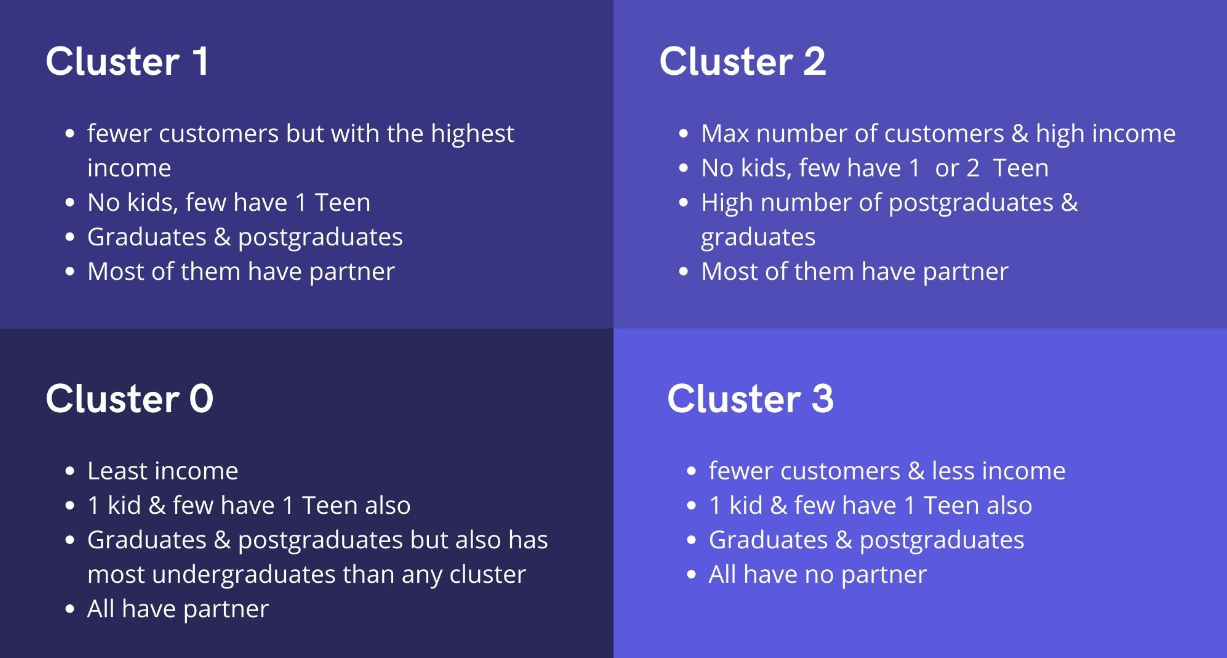

#MODEL BUILDING


Now lets build a multi classification model that will predict the cluster for given input of perticular customer


Steps To Follow:

Import required libraries

Separate features and target column (Clusters)

Create train and test data by spliting

Just add gradient boosting classifier to existing transformer pipeline

Fit data to the new pipeline


In [75]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
# separate features and target column
x = subset.drop('Clusters', axis=1)
y = subset['Clusters']

In [77]:
# create train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)


In [78]:
# adding GradientBoostingClassifier to transformer pipeline
final_pipeline = make_pipeline(transformer, GradientBoostingClassifier())


In [79]:
# fit the data to new pipeline & model
final_pipeline.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Income', 'Age']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Undergraduate',
                                                                                               'Graduate',
                                                                                               'Postgraduate']]))]),
                                                  ['Education_Level']),
                                                 ('nominal',
                                               

In [ ]:
#Above is the diagram with all the steps in our pipeline¶


In [80]:
# check the accuracy of our model
final_pipeline.score(x_test, y_test)

0.9702380952380952

In [ ]:
#You can export this pipeline with all the transformation and trained model¶


In [82]:
import pickle
filename = 'classifier.pkl' # create a variable with name you wanna give to the file
pickle.dump(final_pipeline, open(filename,'wb')) 


In [ ]:
#Model Deployment

In [83]:
# Install streamlit 
# NB : If any error occurs during installation process , run it again
!pip install -q streamlit
!npm install -g localtunnel -U

     |████████████████████████████████| 9.1 MB 5.2 MB/s 
     |████████████████████████████████| 164 kB 61.9 MB/s 
     |████████████████████████████████| 235 kB 42.1 MB/s 
     |████████████████████████████████| 181 kB 68.5 MB/s 
     |████████████████████████████████| 4.7 MB 41.1 MB/s 
     |████████████████████████████████| 78 kB 6.3 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 51 kB 7.0 MB/s 
/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
added 22 packages from 22 contributors in 1.875s


In [84]:
%%writefile customer_segmentation_app.py 


# importing necessary libraries
import pickle
import streamlit as st
import pandas as pd
import numpy as np

#load the model
classifier = pickle.load(open('classifier.pkl','rb'))


#page configuration
st.set_page_config(page_title = 'Customer Segmentation Web App', layout='centered')
st.title('Customer Segmentation Web App')

# customer segmentation function
def segment_customers(input_data):
    
    prediction=classifier.predict(pd.DataFrame(input_data, columns=['Income','Kidhome','Teenhome','Age','Partner','Education_Level']))
    print(prediction)
    pred_1 = 0
    if prediction == 0:
            pred_1 = 'cluster 0'

    elif prediction == 1:
            pred_1 = 'cluster 1'

    elif prediction == 2:
            pred_1 = 'cluster 2'

    elif prediction == 3:
            pred_1 = 'cluster 3'

    return pred_1

def main():
    
    Income = st.text_input("Type In The Household Income")
    Kidhome = st.radio ( "Select Number Of Kids In Household", ('0', '1','2') )
    Teenhome = st.radio ( "Select Number Of Teens In Household", ('0', '1','2') )
    Age = st.slider ( "Select Age", 18, 85 )
    Partner = st.radio ( "Livig With Partner?", ('Yes', 'No') )
    Education_Level = st.radio ( "Select Education", ("Undergraduate", "Graduate", "Postgraduate") )
    
    result = ""

    # when 'Predict' is clicked, make the prediction and store it
    if st.button("Segment Customer"):
        result=segment_customers([[Income,Kidhome,Teenhome,Age,Partner,Education_Level]])
    
    st.success(result)
    

if __name__ == '__main__':
        main ()
        
# I have kept it very simple, but i can buitify the web app by using html

Writing customer_segmentation_app.py


In [ ]:
!streamlit run customer_segmentation_app.py & npx localtunnel --port 8501 


2022-08-28 02:30:48.927 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 2.7s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.75.124.181:8501

your url is: https://lazy-flowers-say-34-75-124-181.loca.lt
